In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os

if 'notebooks' in os.getcwd():
    os.chdir('..')

In [109]:
data = pd.read_csv("data/prices_round_2_day_1.csv", sep = ';')\
    .set_index("timestamp")

In [110]:
data

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
0,-1,PINA_COLADAS,14999,38,14998.0,53.0,NaN,NaN,15001,38,15002.0,53.0,NaN,NaN,15000.0,0.0
0,-1,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0
0,-1,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.0
100,-1,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,-1,PEARLS,9995,20,NaN,NaN,NaN,NaN,10002,10,10005.0,20.0,NaN,NaN,9998.5,-760.0
999900,-1,PINA_COLADAS,15228,102,NaN,NaN,NaN,NaN,15231,102,NaN,NaN,NaN,NaN,15229.5,-483648.0
999900,-1,COCONUTS,8113,178,NaN,NaN,NaN,NaN,8115,76,8116.0,102.0,NaN,NaN,8114.0,-791928.0


In [111]:
coconuts = data.query("product == 'COCONUTS'")
pina_coladas = data.query("product == 'PINA_COLADAS'")

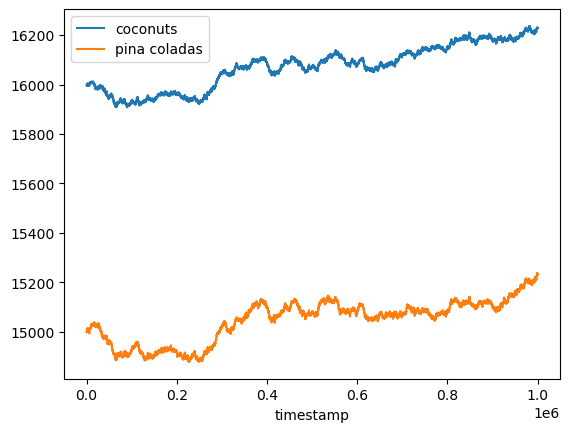

In [112]:
(2*coconuts.mid_price).plot(label = "coconuts")
pina_coladas.mid_price.plot(label = "pina coladas")
plt.legend()

In [113]:
coconuts\
    .mid_price\
    .corr(
        pina_coladas.mid_price
    )

0.9358047926027513

# Verifying spread between coconuts and pina coladas

In [114]:
spread = pina_coladas["mid_price"] - coconuts["mid_price"]  

In [115]:
spread_minus_mean = spread - spread.mean()

## 1st approach- total mean

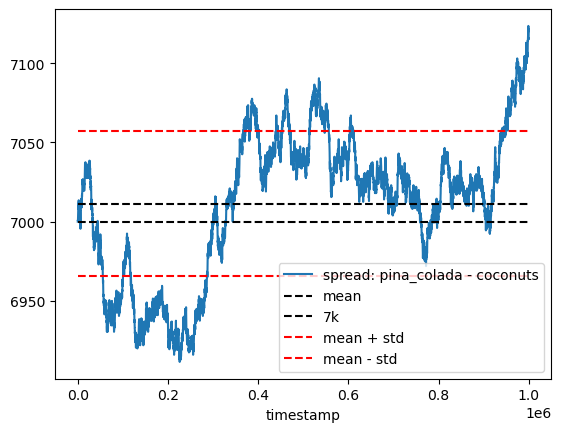

In [116]:
spread.plot(label = "spread: pina_colada - coconuts")
plt.hlines(
    spread.mean(),
    spread.index[0],
    spread.index[-1],
    colors = "black",
    label='mean',
    linestyles="dashed"
)

plt.hlines(
    7_000,
    spread.index[0],
    spread.index[-1],
    colors = "black",
    linestyles="dashed",
    label= "7k"
)

plt.hlines(
    spread.mean() + spread.std(),
    spread.index[0],
    spread.index[-1],
    colors = "red",
    linestyles="dashed",
    label= "mean + std"
)




plt.hlines(
    spread.mean() - spread.std(),
    spread.index[0],
    spread.index[-1],
    colors = "red",
    linestyles="dashed",
    label= "mean - std"
)

plt.legend()

In [84]:
spread.describe()

count    10000.000000
mean      7040.585400
std         41.927414
min       6967.500000
25%       7006.000000
50%       7029.500000
75%       7075.500000
max       7140.000000
Name: mid_price, dtype: float64

## 2nd approach - rolling mean

# Veryfing mean of spread over time

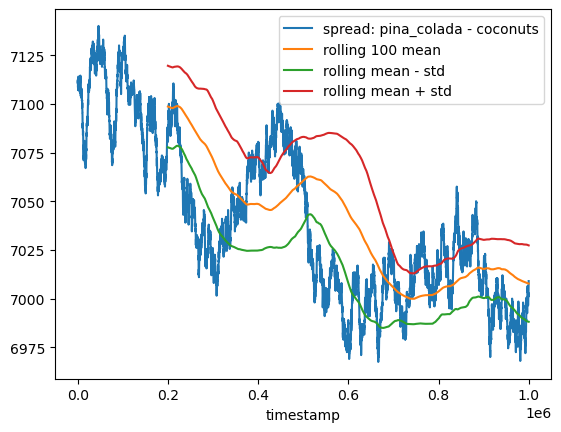

In [91]:
spread.plot(label = "spread: pina_colada - coconuts")

avg_rolling_spread = spread.rolling(1000)\
    .mean()

rolling_std_spread = spread.rolling(1000)\
    .std()

avg_rolling_spread.plot(label = "rolling 100 mean")
(avg_rolling_spread - rolling_std_spread).plot(label = "rolling mean - std")
(avg_rolling_spread + rolling_std_spread).plot(label = "rolling mean + std")

plt.legend()

In [86]:
avg_rolling_spread

timestamp
0             NaN
100           NaN
200           NaN
300           NaN
400           NaN
           ...   
999500    6998.97
999600    6999.19
999700    6999.34
999800    6999.57
999900    6999.80
Name: mid_price, Length: 10000, dtype: float64

<AxesSubplot:xlabel='timestamp'>

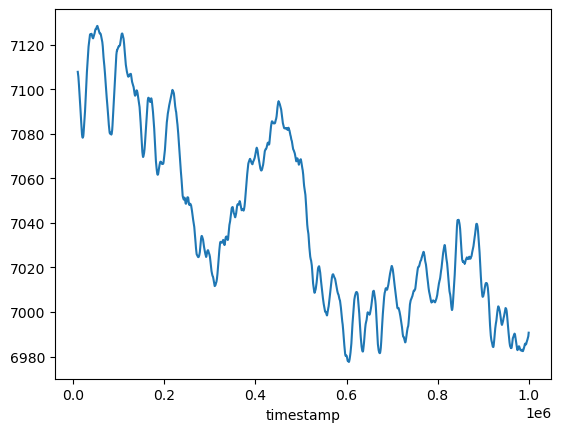

In [87]:
spread.rolling(100)\
    .mean()\
    .plot()